# Data Science Intern @Lets Grow More 
# September

## Developer :Abhinav Pratap Singh


# Task 7: Developing a Neural Network that can read Handwriting

# Importing the required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

In [2]:
# example of loading the mnist dataset
from keras.datasets import mnist
# load dataset
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 9s 1us/step


In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


<p style = "font-size:16px"><b>INFERENCE:</b></p>
We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

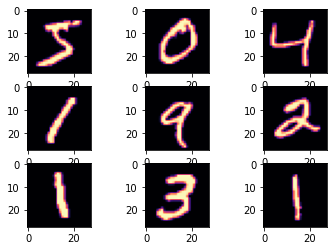

In [4]:
# plot first few images
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('magma'))

<p style = "font-size:16px"><b>INFERENCE:</b></p>
A plot of the first nine images in the dataset is also created showing the natural handwritten nature of the images to be classified.

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

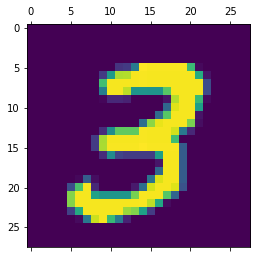

In [6]:
plt.matshow(X_train[7])
plt.show()

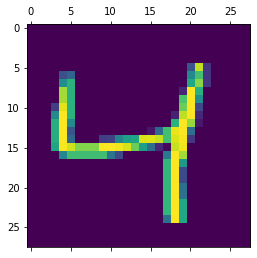

In [7]:
plt.matshow(X_train[2])
plt.show()

In [8]:
y_train[6]

1

<p style = "font-size:16px"><b>INFERENCE:</b></p>

As the pixel intensities are currently between the range of 0 and 255, we proceed to normalize the features by dividing 255.

# Data cleaning, normalisation and cleaning:

## Prepare Pixel data:
* Pixel values are often unsigned integers in the range between 0 and 255. Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as in the slower than expected training of the model.
 
 
We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Model fitting:
We proceed by fitting several simple neural network models using Keras (with TensorFlow as our backend) and collect their accuracy. The model that performs the best on the validation set will be used as the model of choice for the competition.

## Model 1: Very simple neural network with no hidden layers - 


In [15]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 784us/step - loss: 0.4656 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.3036 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 1s 719us/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.2723 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 1s 682us/step - loss: 0.2664 - accuracy: 0.9260


In [16]:
model1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 738us/step - loss: 0.2665 - accuracy: 0.9243


[0.2665192186832428, 0.9243000149726868]

ACCURACY = 92.74%

In [17]:
y_predicted = model1.predict(X_test_flattened)
y_predicted[3]

array([9.9966210e-01, 8.9292364e-08, 1.4458042e-01, 7.6318383e-03,
       7.5965349e-05, 1.5326855e-01, 2.6061058e-01, 3.4063548e-02,
       2.2400677e-02, 4.0495098e-02], dtype=float32)

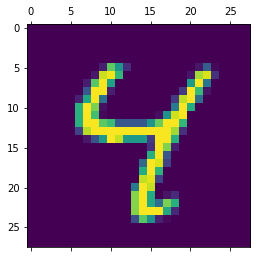

In [18]:
plt.matshow(X_test[6])
plt.show()

<p style = "font-size:16px"><b>INFERENCE:</b></p>
np.argmax finds a maximum element from an array and returns the index of it.

In [19]:
np.argmax(y_predicted[6])

4

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  931,   14,    9,    4,   12,   11,   33,    3],
       [   4,    0,   20,  921,    0,   25,    2,   12,   17,    9],
       [   1,    2,    3,    1,  914,    0,   15,    4,    8,   34],
       [  10,    3,    4,   31,   10,  778,   17,    5,   26,    8],
       [  12,    3,    6,    1,    7,    9,  917,    2,    1,    0],
       [   2,    6,   21,    6,    7,    0,    0,  954,    1,   31],
       [   8,   14,    8,   26,   10,   37,   11,   13,  837,   10],
       [  11,    7,    1,   10,   29,    8,    0,   28,    4,  911]])>

Text(69.0, 0.5, 'Truth')

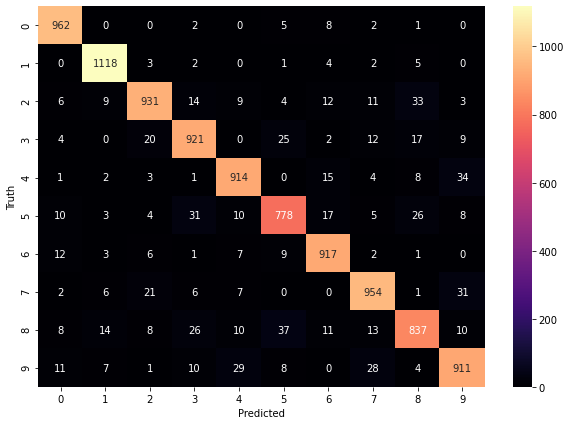

In [23]:
#Heatmap
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap = "magma")
plt.xlabel('Predicted')
plt.ylabel('Truth')

<p style = "font-size:16px"><b>INFERENCE:</b></p>
We saw that without using hidden layers, we got an accuracy of 92.74% .

## Model 2 : Using simple neural network with 1 layer - 

In [24]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.1222 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.0836 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0634 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.0489 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0399 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.0311 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.0266 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 2s 980us/step -

In [25]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 716us/step - loss: 0.0772 - accuracy: 0.9799


[0.07718977332115173, 0.9799000024795532]

<p style = "font-size:16px"><b>INFERENCE:</b></p>
Here, we got an accuracy of 97.92% in the validation test set

## Model 3 : Using simple neural network with 3 layer - 

In [26]:
model3 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2087 - accuracy: 0.9361
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0904 - accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0426 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0362 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0314 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.023

In [27]:
model3.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9783


[0.09464599192142487, 0.9782999753952026]

ACCURACY = 97.85

Text(69.0, 0.5, 'Truth')

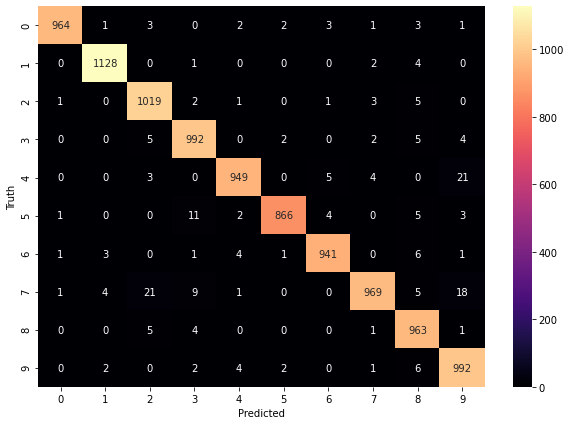

In [28]:
y_predicted = model3.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

# HeatMap
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap = "magma")
plt.xlabel('Predicted')
plt.ylabel('Truth')

<p style = "font-size:16px"><b>INFERENCE:</b></p>
Here, we got an accuracy of 97.85% in the validation test set.